In [30]:
import pandas as pd

# Načti data
df = pd.read_csv("procedures.csv")

# Očisti názvy sloupců (pro případ, že mají mezery)
df.columns = df.columns.str.strip()

# Odstraň všechny řádky s chybějícími hodnotami
df_clean = df.dropna()


# Přejmenování sloupců
df_clean = df.rename(columns={"PATIENT": "PATIENT_ID"})

# Ulož do nového souboru
df_clean.to_csv("procedures.csv", index=False)


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pro větší přehlednost grafů
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Načtení dat
df = pd.read_csv("procedures.csv")

# 🟢 2. Základní přehled
print("Počet řádků:", len(df))
print("Počet sloupců:", len(df.columns))
print("Náhled:")
display(df.head())

# 3. Zkontroluj typy
print("Typy sloupců:")
print(df.dtypes)

# 4. Převod BASE_COST na číslo
df["BASE_COST"] = pd.to_numeric(df["BASE_COST"], errors="coerce")

# 5. Chybějící hodnoty
print("\nChybějící hodnoty:")
print(df.isnull().sum())
df_clean = df.dropna()

# 7. Součet a průměr nákladů
print("Součet provedených procedur:", df["PROCEDURE_ID"].count())
print("Průměr BASE_COST:", df["CODE"].mean())

# 8. Duplikáty
duplicates = df[df.duplicated()]
print(f"Duplikáty ({len(duplicates)} záznamů):")
display(duplicates)


Počet řádků: 75473
Počet sloupců: 8
Náhled:


,DATE,PATIENT_ID,PROCEDURE_ID,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
1,2020-03-13,067318a4-db8f-447f-8b6e-f2f61e9baaa5,1ea74a77-3ad3-4948-a9cc-3084462035d6,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
2,2020-04-28,067318a4-db8f-447f-8b6e-f2f61e9baaa5,e03b96de-5604-4989-a2d5-03a63e041eab,117015009,Throat culture (procedure),2169.16,43878008.0,Streptococcal sore throat (disorder)
3,2020-03-11,ae9efba3-ddc4-43f9-a781-f72019388548,eeab7c2d-71ba-4e04-af16-87a01dce7d54,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
4,2020-03-01,199c586f-af16-4091-9998-ee4cfc02ee7a,8333efdf-f7bf-43bb-b73f-2b663d14c1ad,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19


Typy sloupců:
DATE                  object
PATIENT_ID            object
PROCEDURE_ID          object
CODE                   int64
DESCRIPTION           object
BASE_COST            float64
REASONCODE           float64
REASONDESCRIPTION     object
dtype: object

Chybějící hodnoty:
DATE                 0
PATIENT_ID           0
PROCEDURE_ID         0
CODE                 0
DESCRIPTION          0
BASE_COST            0
REASONCODE           0
REASONDESCRIPTION    0
dtype: int64
Součet provedených procedur: 75473
Průměr BASE_COST: 321253054.6036331
Duplikáty (0 záznamů):


,DATE,PATIENT_ID,PROCEDURE_ID,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION


In [78]:
#patients
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Načti data
df = pd.read_csv("patients.csv")

# Očisti názvy sloupců (pro případ, že mají mezery)
df.columns = df.columns.str.strip()


# Přejmenování sloupců
df_clean = df.rename(columns={"Id": "PATIENT_ID"})

#Přidání kolonky věk

df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"], errors="coerce")
today = pd.Timestamp.today()
df_clean["AGE"] = (today - df["BIRTHDATE"]).dt.days // 365

# Ulož do nového souboru
df_clean.to_csv("patients.csv", index=False)


# Pro větší přehlednost grafů
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# Základní přehled
print("Počet řádků:", len(df))
print("Počet sloupců:", len(df.columns))
print("\nNáhled:")
display(df.head())

# Zkontroluj typy
print("\nTypy sloupců:")
print(df.dtypes)

# Chybějící hodnoty
print("\nChybějící hodnoty v jednotlivých sloupcích:")
print(df.isnull().sum())

# Duplikáty
duplicates = df[df.duplicated()]
print(f"\nNalezeno {len(duplicates)} duplicitních záznamů.")
if not duplicates.empty:
    print(duplicates.head())

max_age = df['AGE'].max()
min_age = df['AGE'].min()
print("Maximální věk:", max_age)
print("Minimální věk:", min_age)





Počet řádků: 12352
Počet sloupců: 20

Náhled:


,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,Jacinto644,Kris249,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,7
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,Alva958,Krajcik437,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,8
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,Jayson808,Fadel536,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,32
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,Jimmie93,Harris789,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,21
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,Gregorio366,Auer97,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,28



Typy sloupců:
PATIENT_ID                     object
BIRTHDATE              datetime64[ns]
DEATHDATE                      object
SSN                            object
FIRST                          object
LAST                           object
RACE                           object
ETHNICITY                      object
GENDER                         object
BIRTHPLACE                     object
ADDRESS                        object
CITY                           object
STATE                          object
COUNTY                         object
ZIP                           float64
LAT                           float64
LON                           float64
HEALTHCARE_EXPENSES           float64
HEALTHCARE_COVERAGE           float64
AGE                             int64
dtype: object

Chybějící hodnoty v jednotlivých sloupcích:
PATIENT_ID                 0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
FIRST                      0
LAST                 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pro větší přehlednost grafů
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Načtení dat
df = pd.read_csv("medications.csv")


# 🟢 2. Základní přehled
print("Počet řádků:", len(df))
print("Počet sloupců:", len(df.columns))
print("Náhled:")
display(df.head())

# 3. Zkontroluj typy
print("Typy sloupců:")
print(df.dtypes)


# 5. Chybějící hodnoty
print("\nChybějící hodnoty:")
print(df.isnull().sum())
df_clean = df.rename(columns={"PATIENT": "PATIENT_ID"})
df_clean.to_csv("medications.csv", index=False)


# 8. Duplikáty
duplicates = df[df.duplicated()]
print(f"Duplikáty ({len(duplicates)} záznamů):")
display(duplicates)


Počet řádků: 5352
Počet sloupců: 13
Náhled:


,MEDICATION_START,MEDICATION_STOP,PATIENT_ID,PAYER,ENCOUNTER,MEDICATION_CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2014-08-27T07:10:43Z,2015-08-26T21:57:17Z,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,b046940f-1664-3047-bca7-dfa76be352a4,23c14b40-6a1e-a422-e0a2-751e44fb4ca7,807283,Mirena 52 MG Intrauterine System,10.00,0.00,12,120.00,NaN,NaN
1,2019-08-05T21:57:17Z,2020-07-30T21:57:17Z,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,b046940f-1664-3047-bca7-dfa76be352a4,70d9e778-4ec3-edc8-423e-c60189b62884,757594,Jolivette 28 Day Pack,229.32,0.00,12,2751.84,NaN,NaN
2,2020-07-30T21:57:17Z,2021-07-25T21:57:17Z,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,b046940f-1664-3047-bca7-dfa76be352a4,4aa5f00f-829c-fbb8-2b9e-6139e49e6151,757594,Jolivette 28 Day Pack,764.40,0.00,12,9172.80,NaN,NaN
3,2021-10-24T10:41:12Z,NaN,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,b046940f-1664-3047-bca7-dfa76be352a4,3b81c72e-3c1b-6259-21f5-fa49a4eaeb7f,310325,ferrous sulfate 325 MG Oral Tablet,0.15,0.15,43,6.45,NaN,NaN
4,2021-11-07T12:23:13Z,2021-11-07T12:23:13Z,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,b046940f-1664-3047-bca7-dfa76be352a4,0ffa9f68-d03e-7795-6aba-30a28d7b2378,1535362,sodium fluoride 0.0272 MG/MG Oral Gel,129.94,129.94,1,129.94,66383009.0,Gingivitis (disorder)


Typy sloupců:
MEDICATION_START      object
MEDICATION_STOP       object
PATIENT_ID            object
PAYER                 object
ENCOUNTER             object
MEDICATION_CODE        int64
DESCRIPTION           object
BASE_COST            float64
PAYER_COVERAGE       float64
DISPENSES              int64
TOTALCOST            float64
REASONCODE           float64
REASONDESCRIPTION     object
dtype: object

Chybějící hodnoty:
MEDICATION_START        0
MEDICATION_STOP       356
PATIENT_ID              0
PAYER                   0
ENCOUNTER               0
MEDICATION_CODE         0
DESCRIPTION             0
BASE_COST               0
PAYER_COVERAGE          0
DISPENSES               0
TOTALCOST               0
REASONCODE           1058
REASONDESCRIPTION    1058
dtype: int64
Duplikáty (0 záznamů):


,MEDICATION_START,MEDICATION_STOP,PATIENT_ID,PAYER,ENCOUNTER,MEDICATION_CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION


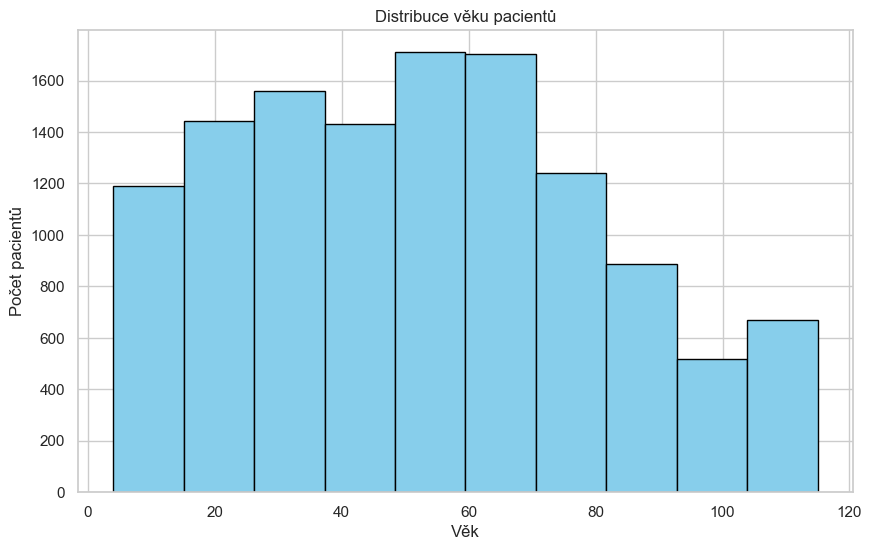

In [74]:
df['AGE'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuce věku pacientů')
plt.xlabel('Věk')
plt.ylabel('Počet pacientů')
plt.show()

C:\Users\Karolína\AppData\Local\Temp\ipykernel_26128\1298176933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["MONTH"] = df_2019["DATE"].dt.to_period("M")


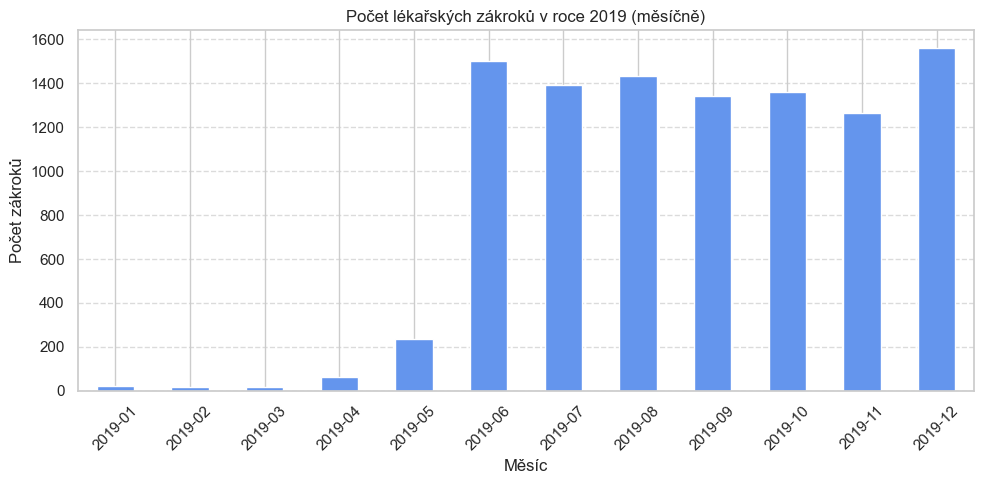

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Načti data
df = pd.read_csv("procedures.csv", parse_dates=["DATE"])

# Filtrovat pouze rok 2019
df_2019 = df[df["DATE"].dt.year == 2019]

# Vytvoř sloupec s měsícem (např. 2020-03)
df_2019["MONTH"] = df_2019["DATE"].dt.to_period("M")

# Spočítat počet procedur za každý měsíc
monthly_counts = df_2019.groupby("MONTH").size()

# Vykreslit graf
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind="bar", color="cornflowerblue")

plt.title("Počet lékařských zákroků v roce 2019 (měsíčně)")
plt.xlabel("Měsíc")
plt.ylabel("Počet zákroků")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()